In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class SVM():
    def fit(self, X, y):
        self.w = np.random.normal(size=X.shape[1])
        self.b = np.random.normal()
        
        
    def predict(self, X):
        value = np.dot(np.array(X), self.w) + self.b
        y = np.sign(value)
        return y

In [3]:
num_subjects = 1000
num_features = 2
X = np.random.normal(size=(num_subjects, num_features)) # 1000 subjects, 2 features
y = np.random.choice([-1,1], size=num_subjects)
print(X.shape, y.shape)

(1000, 2) (1000,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(500, 2) (500, 2) (500,) (500,)


In [5]:
model = SVM()
model.fit(X_train, y_train)
predictions = model.predict(X_test) 

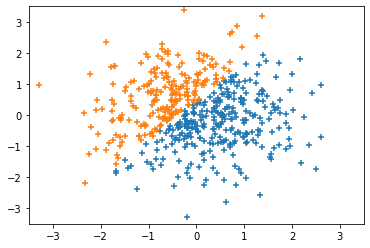

In [6]:
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == 1], 0], y=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == 1],1], marker='+')
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == -1], 0], y=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == -1],1], marker='+')

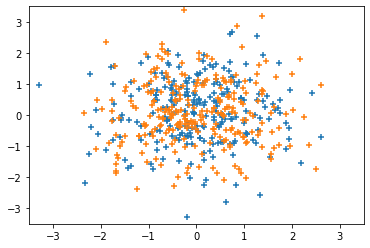

In [7]:
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if y_test[i] == 1], 0], y=X_test[[i for i in range(X_test.shape[0]) if y_test[i] == 1],1], marker='+')
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if y_test[i] == -1], 0], y=X_test[[i for i in range(X_test.shape[0]) if y_test[i] == -1],1], marker='+')

In [8]:
print(model.w, model.b)

[ 0.99550302 -0.80370024] 0.3496670365962995


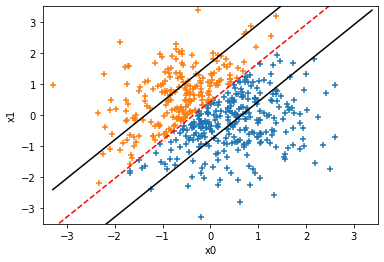

In [12]:
x_min = np.min(X_test.flatten())
x_max = np.max(X_test.flatten())
plt.xlabel('x0')
plt.ylabel('x1')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
# decision boundary vector = (x0*w0+x1*w1+...+xn*wn)+b
# for 2d, v = x0*w0+x1*w1+b
# so, x1 = (v-x0*w0-b)/w1
y_min = (-model.w[0]*x_min-model.b)/model.w[1]
y_max = (-model.w[0]*x_max-model.b)/model.w[1]
plt.plot([x_min, x_max], [y_min, y_max], 'r--')
# positive sv
y_min = (1-model.w[0]*x_min-model.b)/model.w[1]
y_max = (1-model.w[0]*x_max-model.b)/model.w[1]
plt.plot([x_min, x_max], [y_min, y_max], 'k')
# negative sv
y_min = (-1-model.w[0]*x_min-model.b)/model.w[1]
y_max = (-1-model.w[0]*x_max-model.b)/model.w[1]
plt.plot([x_min, x_max], [y_min, y_max], 'k')
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == 1], 0], y=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == 1],1], marker='+')
plt.scatter(x=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == -1], 0], y=X_test[[i for i in range(X_test.shape[0]) if predictions[i] == -1],1], marker='+')